In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [33]:
import os
import pandas as pd
import numpy as np

feat_path="processed_dataset/feat/"
label_path="processed_dataset/label/"

record=os.listdir(feat_path)

In [60]:
train_name= [item for item in record if item[0]=='1']
test_name= [item for item in record if item[0]=='2']

In [34]:
def LoadData() : 
    for item in record :
        data = torch.from_numpy(np.load(feat_path + item))
        label = torch.from_numpy(np.load(label_path + item))
        print(data, label)

In [62]:
class CustomDataset(Dataset):
    def __init__(self, annotations_file, transform=None, target_transform=None):
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        if status==1 :
            item= train_name[idx]
        else :
            item=test_name[idx]
        feat = np.load(feat_path + item)
        label = np.load(label_path + item)
        if self.transform:
            feat = self.transform(feat)
        if self.target_transform:
            label = self.target_transform(label)
        return feat, label

In [65]:
training_data
test_data
status

NameError: name 'training_data' is not defined

In [63]:
status=1
CustomDataset(training_data)
statue=2
CustomDataset(test_data)

NameError: name 'training_data' is not defined

## DATALOADER

In [45]:
from torch.utils.data import DataLoader

train = DataLoader(training_data, batch_size=64, shuffle=True)

In [46]:
dataset_iter = iter(dataset)
for indices in batch_sampler:
    yield collate_fn([next(dataset_iter) for _ in indices])

SyntaxError: 'yield' outside function (<ipython-input-46-5f3764ea4fcb>, line 3)

In [3]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
CustomDataset(training_data)

In [47]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [9]:
len(train_dataloader)

938

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


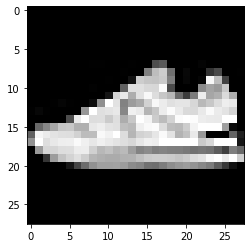

torch.Tensor

In [26]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
type(label)
#print("Label: ",labels_map[f"label"])